In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from scipy.io import arff

In [124]:
data, meta = arff.loadarff('seismic-bumps.arff')
df = pd.DataFrame(data)
df.shape

(2584, 19)

## Dekodujemy kolumny będące object

In [125]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

### Informacje o atrybutach:

1. seismic: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmiczną
(a – brak zagrożenia, b – niskie zagrożenie, c – wysokie zagrożenie, d – stan zagrożenia);

2. seismoacoustic: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmoakustyczną;

3. shift: informacja o rodzaju zmiany
(W – zmiana wydobywcza, N – zmiana przygotowawcza);

4. genergy: energia sejsmiczna zarejestrowana podczas poprzedniej zmiany przez najbardziej aktywny geofon (GMax) spośród geofonów monitorujących ścianę;

5. gpuls: liczba impulsów zarejestrowanych podczas poprzedniej zmiany przez GMax;

6. gdenergy: odchylenie energii zarejestrowanej podczas poprzedniej zmiany przez GMax od średniej energii zarejestrowanej w ośmiu poprzednich zmianach;

7. gdpuls: odchylenie liczby impulsów zarejestrowanych podczas poprzedniej zmiany przez GMax od średniej liczby impulsów zarejestrowanych w ośmiu poprzednich zmianach;

8. ghazard: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmoakustyczną na podstawie rejestracji wyłącznie z GMax;

9. nbumps: liczba wstrząsów sejsmicznych zarejestrowanych podczas poprzedniej zmiany;

10. nbumps2: liczba wstrząsów sejsmicznych (w zakresie energii [10², 10³)) zarejestrowanych podczas poprzedniej zmiany;

11. nbumps3: liczba wstrząsów sejsmicznych (w zakresie energii [10³, 10⁴)) zarejestrowanych podczas poprzedniej zmiany;

12. nbumps4: liczba wstrząsów sejsmicznych (w zakresie energii [10⁴, 10⁵)) zarejestrowanych podczas poprzedniej zmiany;

13. nbumps5: liczba wstrząsów sejsmicznych (w zakresie energii [10⁵, 10⁶)) zarejestrowanych podczas ostatniej zmiany;

14. nbumps6: liczba wstrząsów sejsmicznych (w zakresie energii [10⁶, 10⁷)) zarejestrowanych podczas poprzedniej zmiany;

15. nbumps7: liczba wstrząsów sejsmicznych (w zakresie energii [10⁷, 10⁸)) zarejestrowanych podczas poprzedniej zmiany;

16. nbumps89: liczba wstrząsów sejsmicznych (w zakresie energii [10⁸, 10¹⁰)) zarejestrowanych podczas poprzedniej zmiany;

17. energy: całkowita energia wstrząsów sejsmicznych zarejestrowanych podczas poprzedniej zmiany;

18. maxenergy: maksymalna energia wstrząsu sejsmicznego zarejestrowanego podczas poprzedniej zmiany;

19. class: atrybut decyzyjny — „1” oznacza wystąpienie wstrząsu sejsmicznego o wysokiej energii w następnej zmianie
(„stan zagrożenia”), natomiast „0” oznacza brak wystąpienia wstrząsów sejsmicznych o wysokiej energii w następnej zmianie
(„stan niezagrożony”).

In [127]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


In [128]:
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

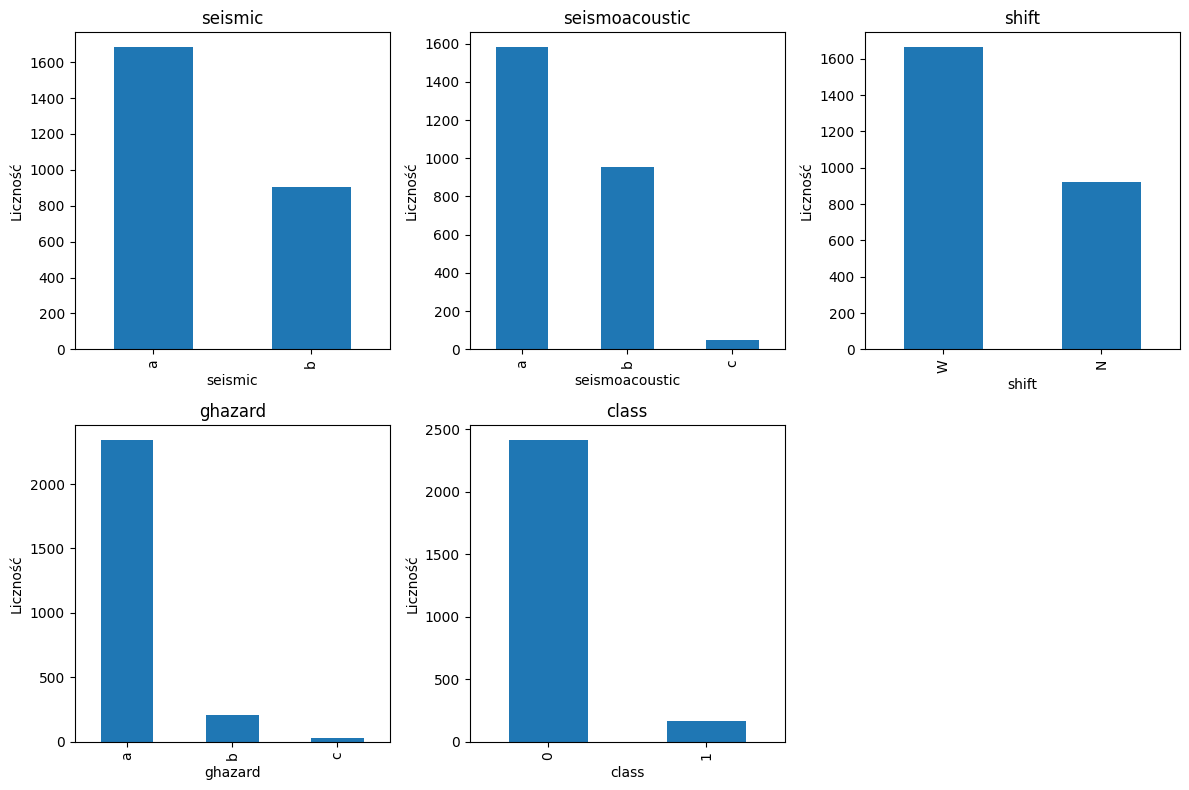

In [129]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
n_cols = 3  # liczba kolumn w siatce wykresów (możesz zmienić)
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # liczba wierszy, zaokrąglona w górę

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # spłaszczamy tablicę axes, żeby łatwiej iterować

for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Liczność")

# Jeśli jest więcej podwykresów niż kolumn, usuń puste
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

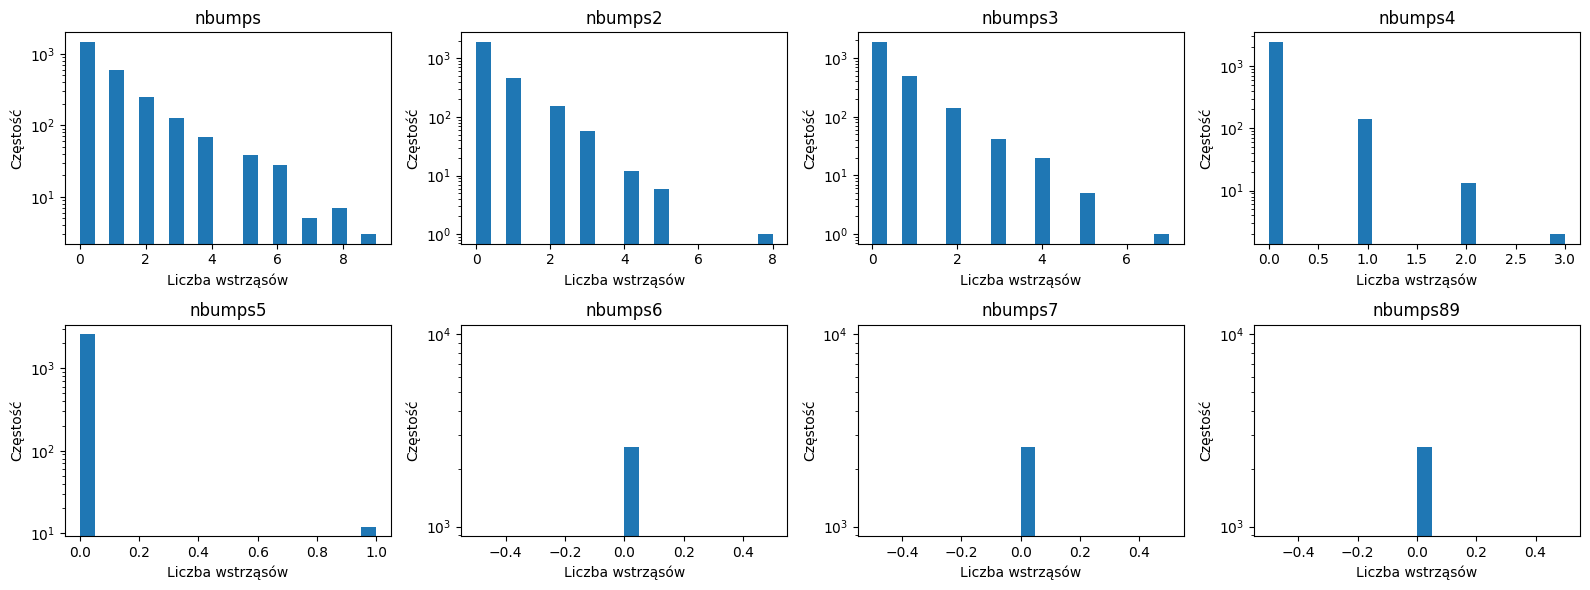

In [130]:
cols = [
    "nbumps", "nbumps2", "nbumps3", "nbumps4",
    "nbumps5", "nbumps6", "nbumps7", "nbumps89"
]

fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.hist(df[col], bins=20)
    ax.set_title(col)
    ax.set_yscale("log")  # kluczowe
    ax.set_xlabel("Liczba wstrząsów")
    ax.set_ylabel("Częstość")

plt.tight_layout()
plt.show()

In [131]:
nbumps_cols = ['nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']

def max_bump_class(row):
    for col in reversed(nbumps_cols):
        if row[col] > 0:
            return int(col.replace('nbumps', ''))
    return 0

df['max_bump_class'] = df[nbumps_cols].apply(max_bump_class, axis=1)

cols = df.columns.tolist()
cols.remove('max_bump_class')
cols.insert(-1, 'max_bump_class')
df = df[cols]

df.drop(columns=nbumps_cols, inplace=True)

In [132]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,energy,maxenergy,max_bump_class,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,2000.0,2000.0,3,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,3000.0,3000.0,3,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0,0


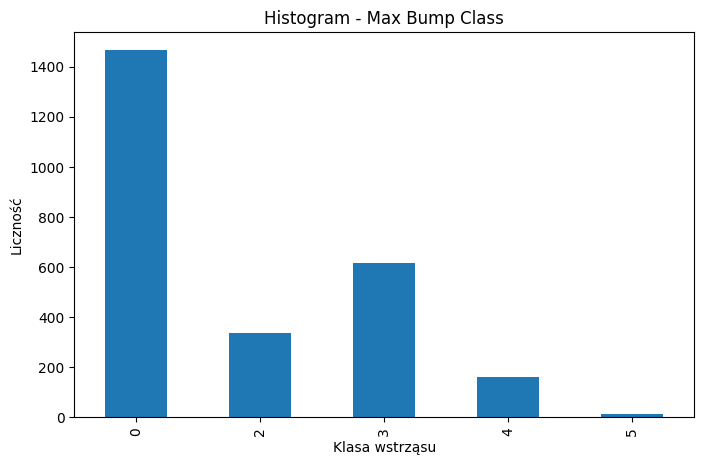

In [133]:
plt.figure(figsize=(8, 5))
df['max_bump_class'].value_counts().sort_index().plot(kind='bar')
plt.title("Histogram - Max Bump Class")
plt.xlabel("Klasa wstrząsu")
plt.ylabel("Liczność")
plt.show()

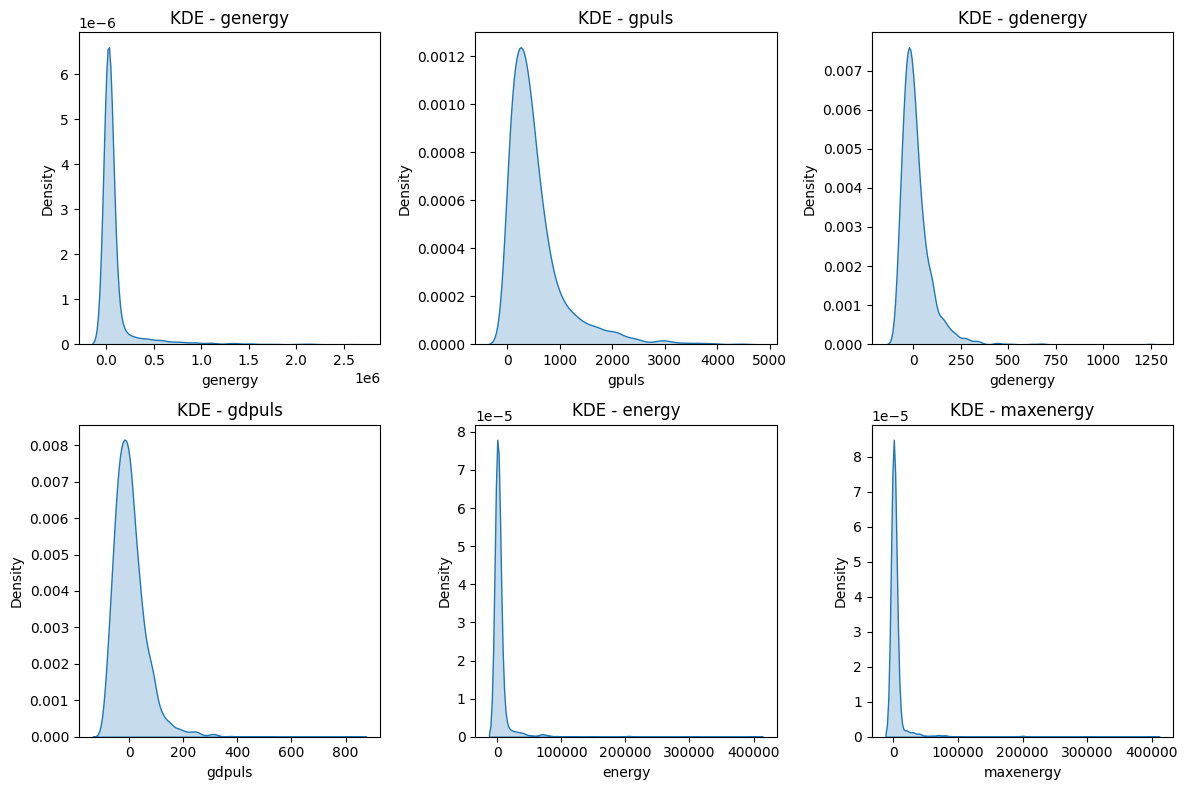

In [134]:
num_cols = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f"KDE - {col}")

# Usuwamy puste podwykresy
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Można dostrzec silną prawoskośność rozkładów danych z przewagą w niskich wartościach bliskich zeru oraz obecność długich ogonów co wskazuje na brak normalności rozkładów i silną obecność obserwacji odstających.

ValueError: Could not interpret value `maxenergy` for `y`. An entry with this name does not appear in `data`.

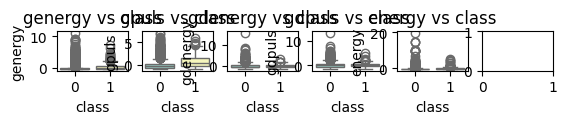

In [149]:
num_cols = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']

for i, col in enumerate(num_cols, 1):
    plt.subplot(8, 6, i)
    sns.boxplot(x="class", y=col, hue="class", data=df, palette="Set3", legend=False)
    plt.title(f"{col} vs class")
    plt.xlabel("class")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [136]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['seismic', 'seismoacoustic', 'shift', 'ghazard']

encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

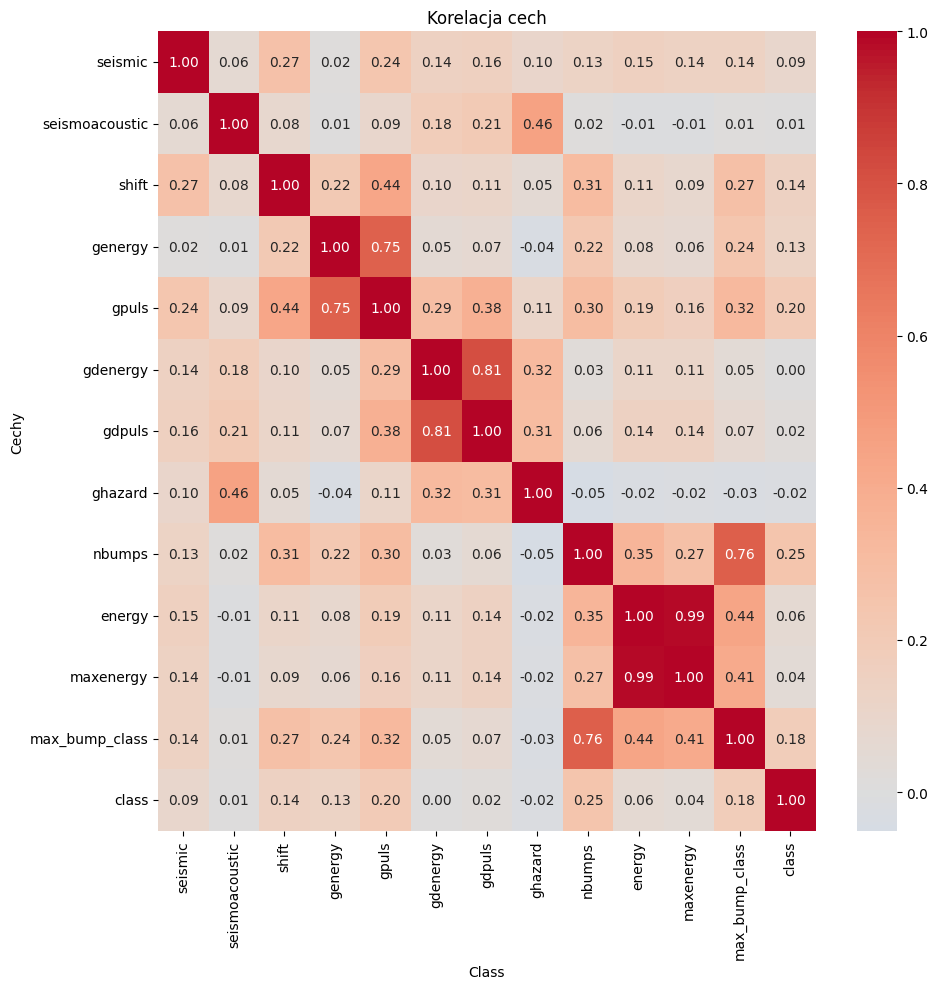

In [137]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)

plt.title("Korelacja cech")
plt.ylabel("Cechy")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

In [138]:
df.drop(columns='maxenergy', inplace=True)

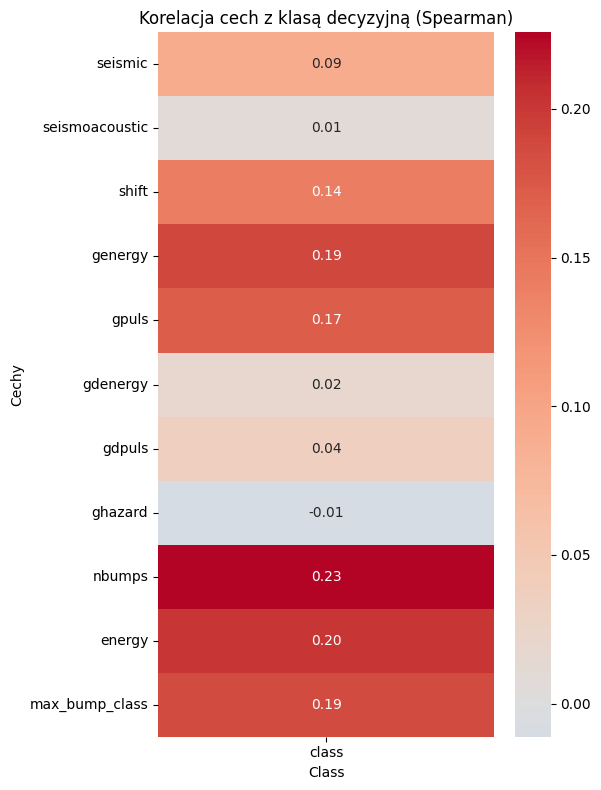

In [139]:
corr = df.corr(method='spearman')

corr_class = corr[['class']].drop('class')

# wykres heatmapy
plt.figure(figsize=(6, 8))
sns.heatmap(
    corr_class,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)

plt.title("Korelacja cech z klasą decyzyjną (Spearman)")
plt.ylabel("Cechy")
plt.xlabel("Class")
plt.tight_layout()
plt.show()


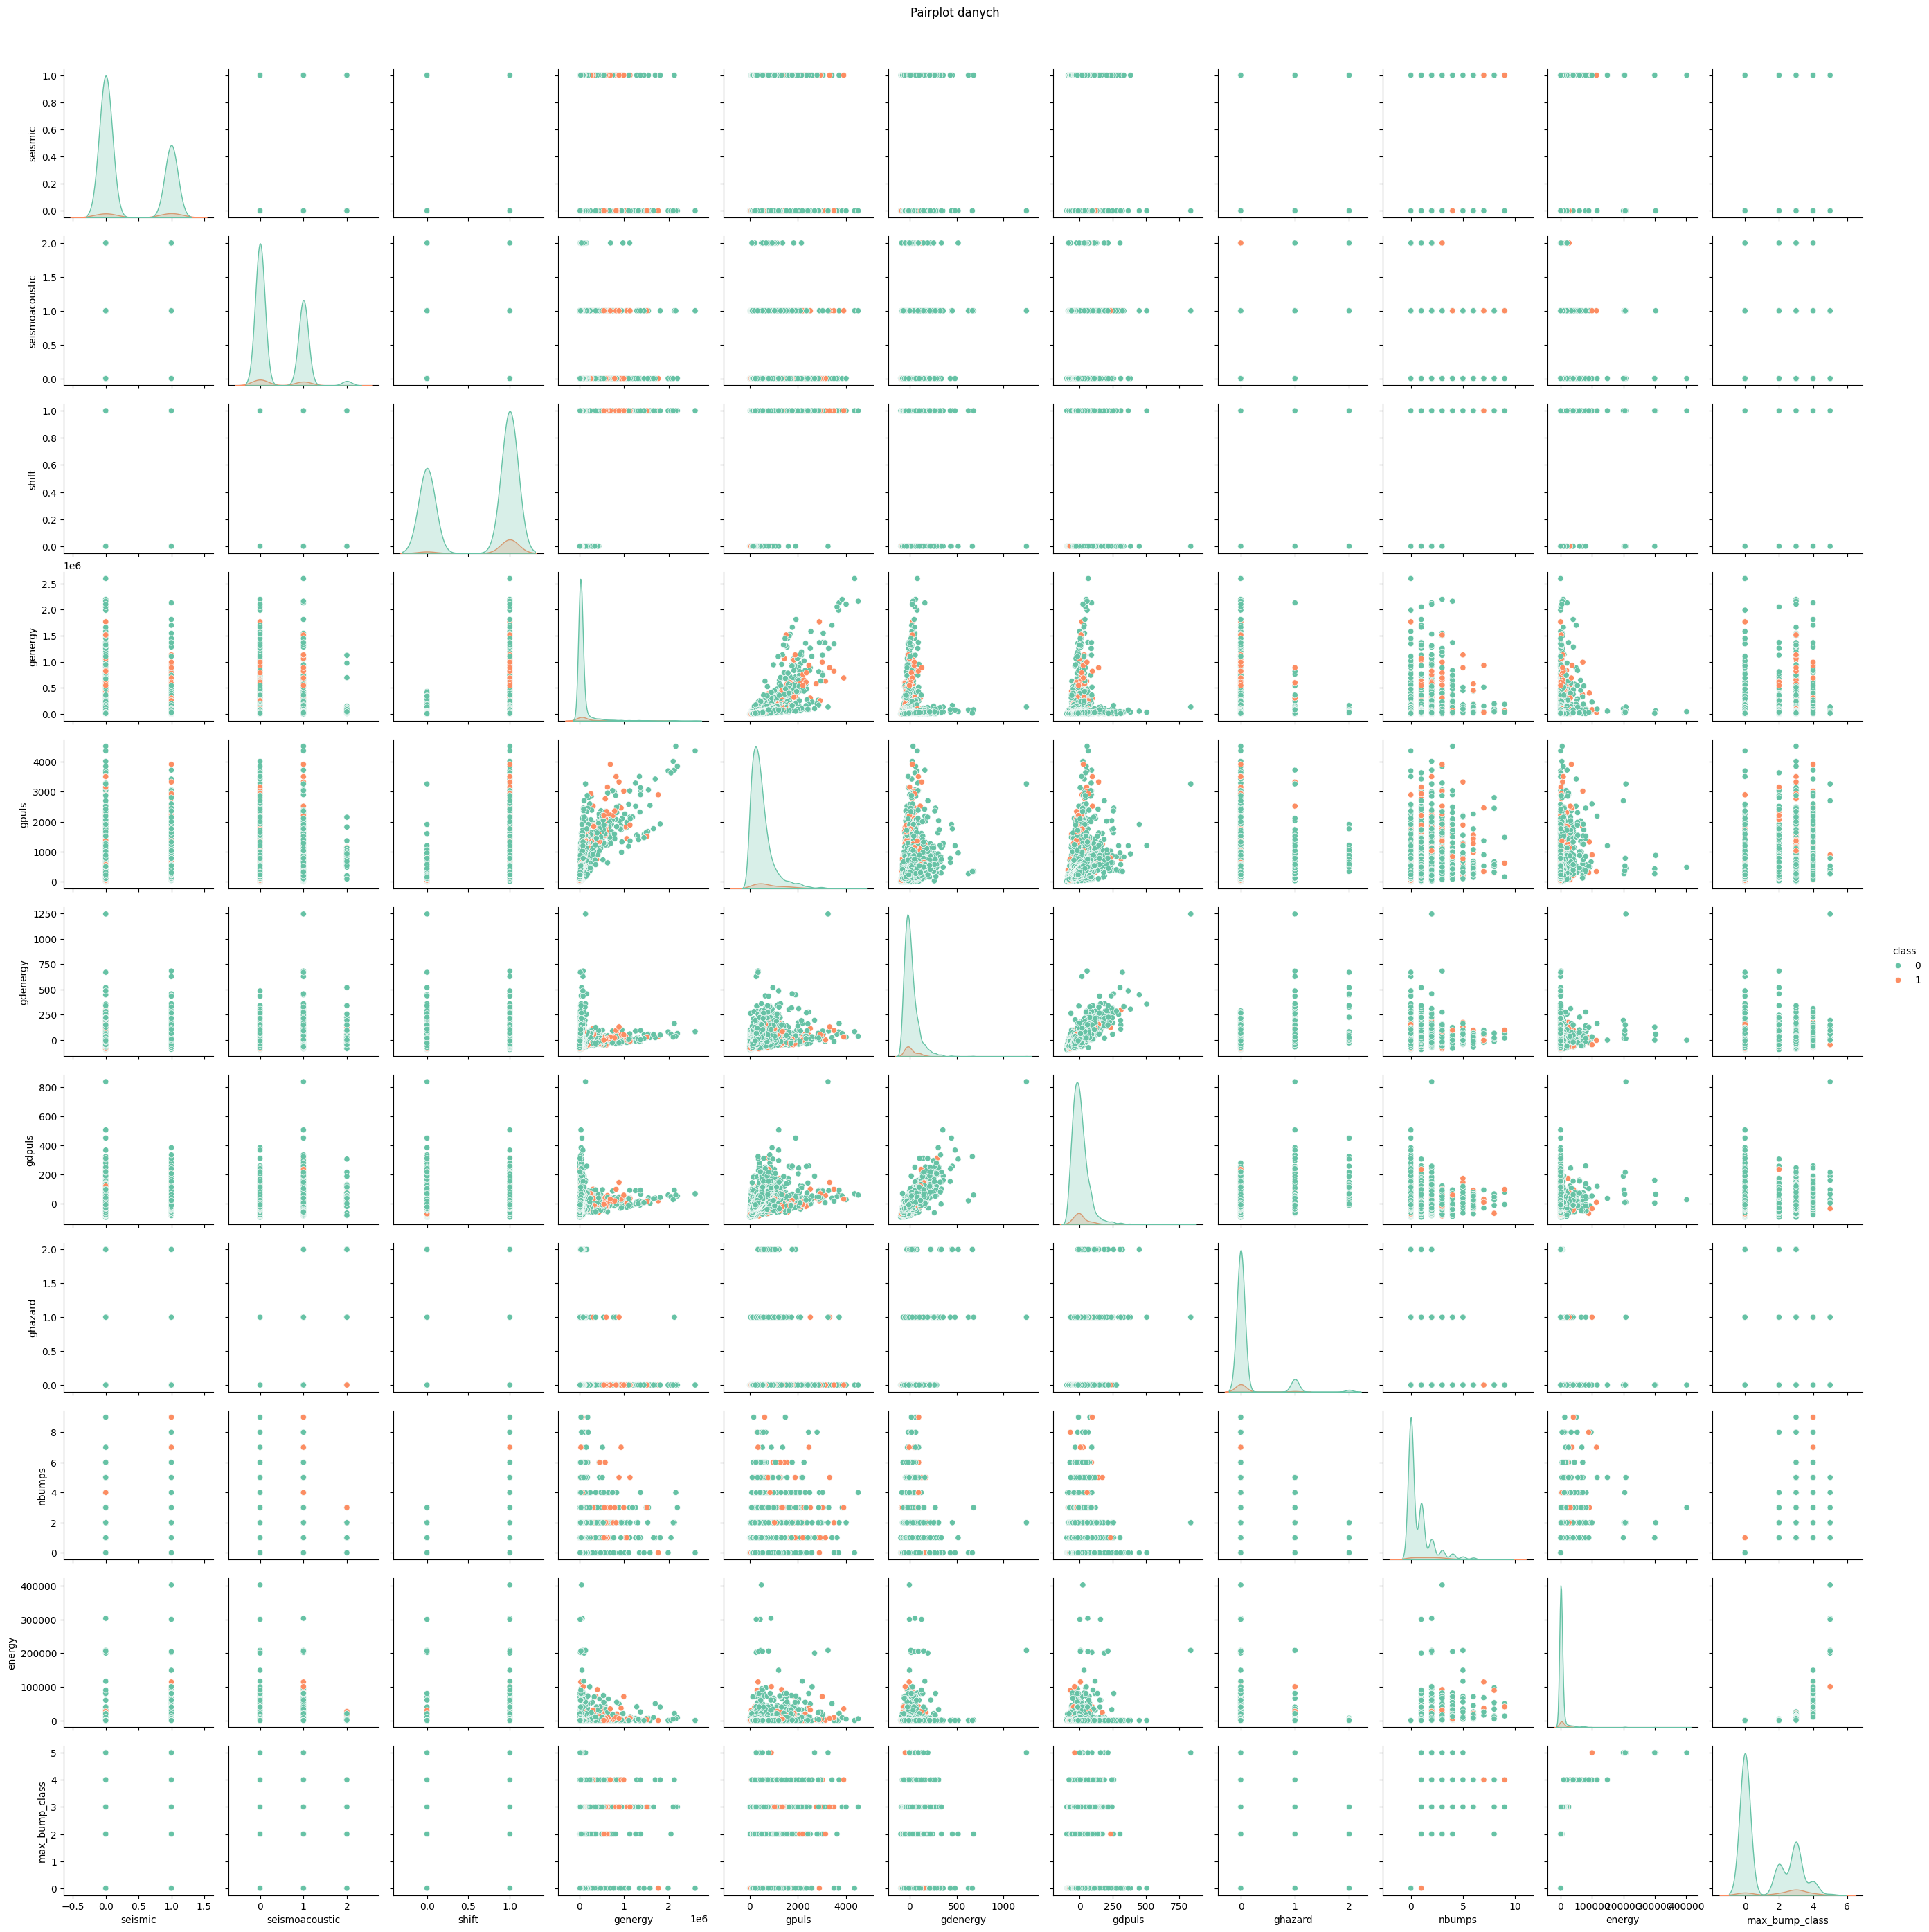

In [140]:
sns.pairplot(df, hue='class', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot danych", y=1.02)
plt.show()

### Preprocess

In [141]:
from sklearn.preprocessing import StandardScaler
num_cols = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
X = df.drop('class', axis=1)  # zamień na swoją kolumnę celu
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### KNN

In [143]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_values = range(3, 20,2)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
results = []

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'k': k,
            'metric': metric,
            'accuracy': acc,
            'y_pred': y_pred  # zachowujemy predykcje dla późniejszej oceny
        })
        print(f"{metric} dla {k} gotowe")

euclidean dla 3 gotowe
euclidean dla 5 gotowe
euclidean dla 7 gotowe
euclidean dla 9 gotowe
euclidean dla 11 gotowe
euclidean dla 13 gotowe
euclidean dla 15 gotowe
euclidean dla 17 gotowe
euclidean dla 19 gotowe
manhattan dla 3 gotowe
manhattan dla 5 gotowe
manhattan dla 7 gotowe
manhattan dla 9 gotowe
manhattan dla 11 gotowe
manhattan dla 13 gotowe
manhattan dla 15 gotowe
manhattan dla 17 gotowe
manhattan dla 19 gotowe
chebyshev dla 3 gotowe
chebyshev dla 5 gotowe
chebyshev dla 7 gotowe
chebyshev dla 9 gotowe
chebyshev dla 11 gotowe
chebyshev dla 13 gotowe
chebyshev dla 15 gotowe
chebyshev dla 17 gotowe
chebyshev dla 19 gotowe
minkowski dla 3 gotowe
minkowski dla 5 gotowe
minkowski dla 7 gotowe
minkowski dla 9 gotowe
minkowski dla 11 gotowe
minkowski dla 13 gotowe
minkowski dla 15 gotowe
minkowski dla 17 gotowe
minkowski dla 19 gotowe


In [145]:
df_results = pd.DataFrame(results)

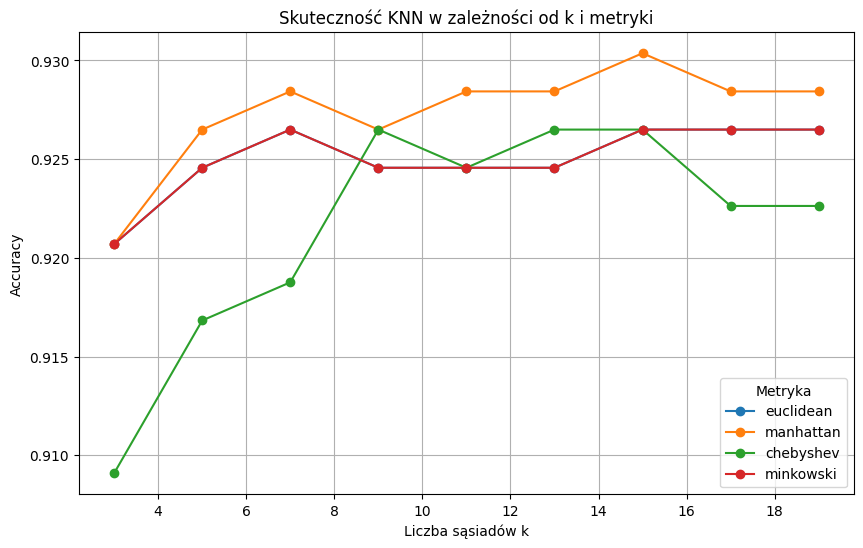

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for metric in df_results['metric'].unique():
    subset = df_results[df_results['metric'] == metric]
    plt.plot(
        subset['k'],
        subset['accuracy'],
        marker='o',
        label=metric
    )

plt.xlabel('Liczba sąsiadów k')
plt.ylabel('Accuracy')
plt.title('Skuteczność KNN w zależności od k i metryki')
plt.legend(title='Metryka')
plt.grid(True)
plt.show()

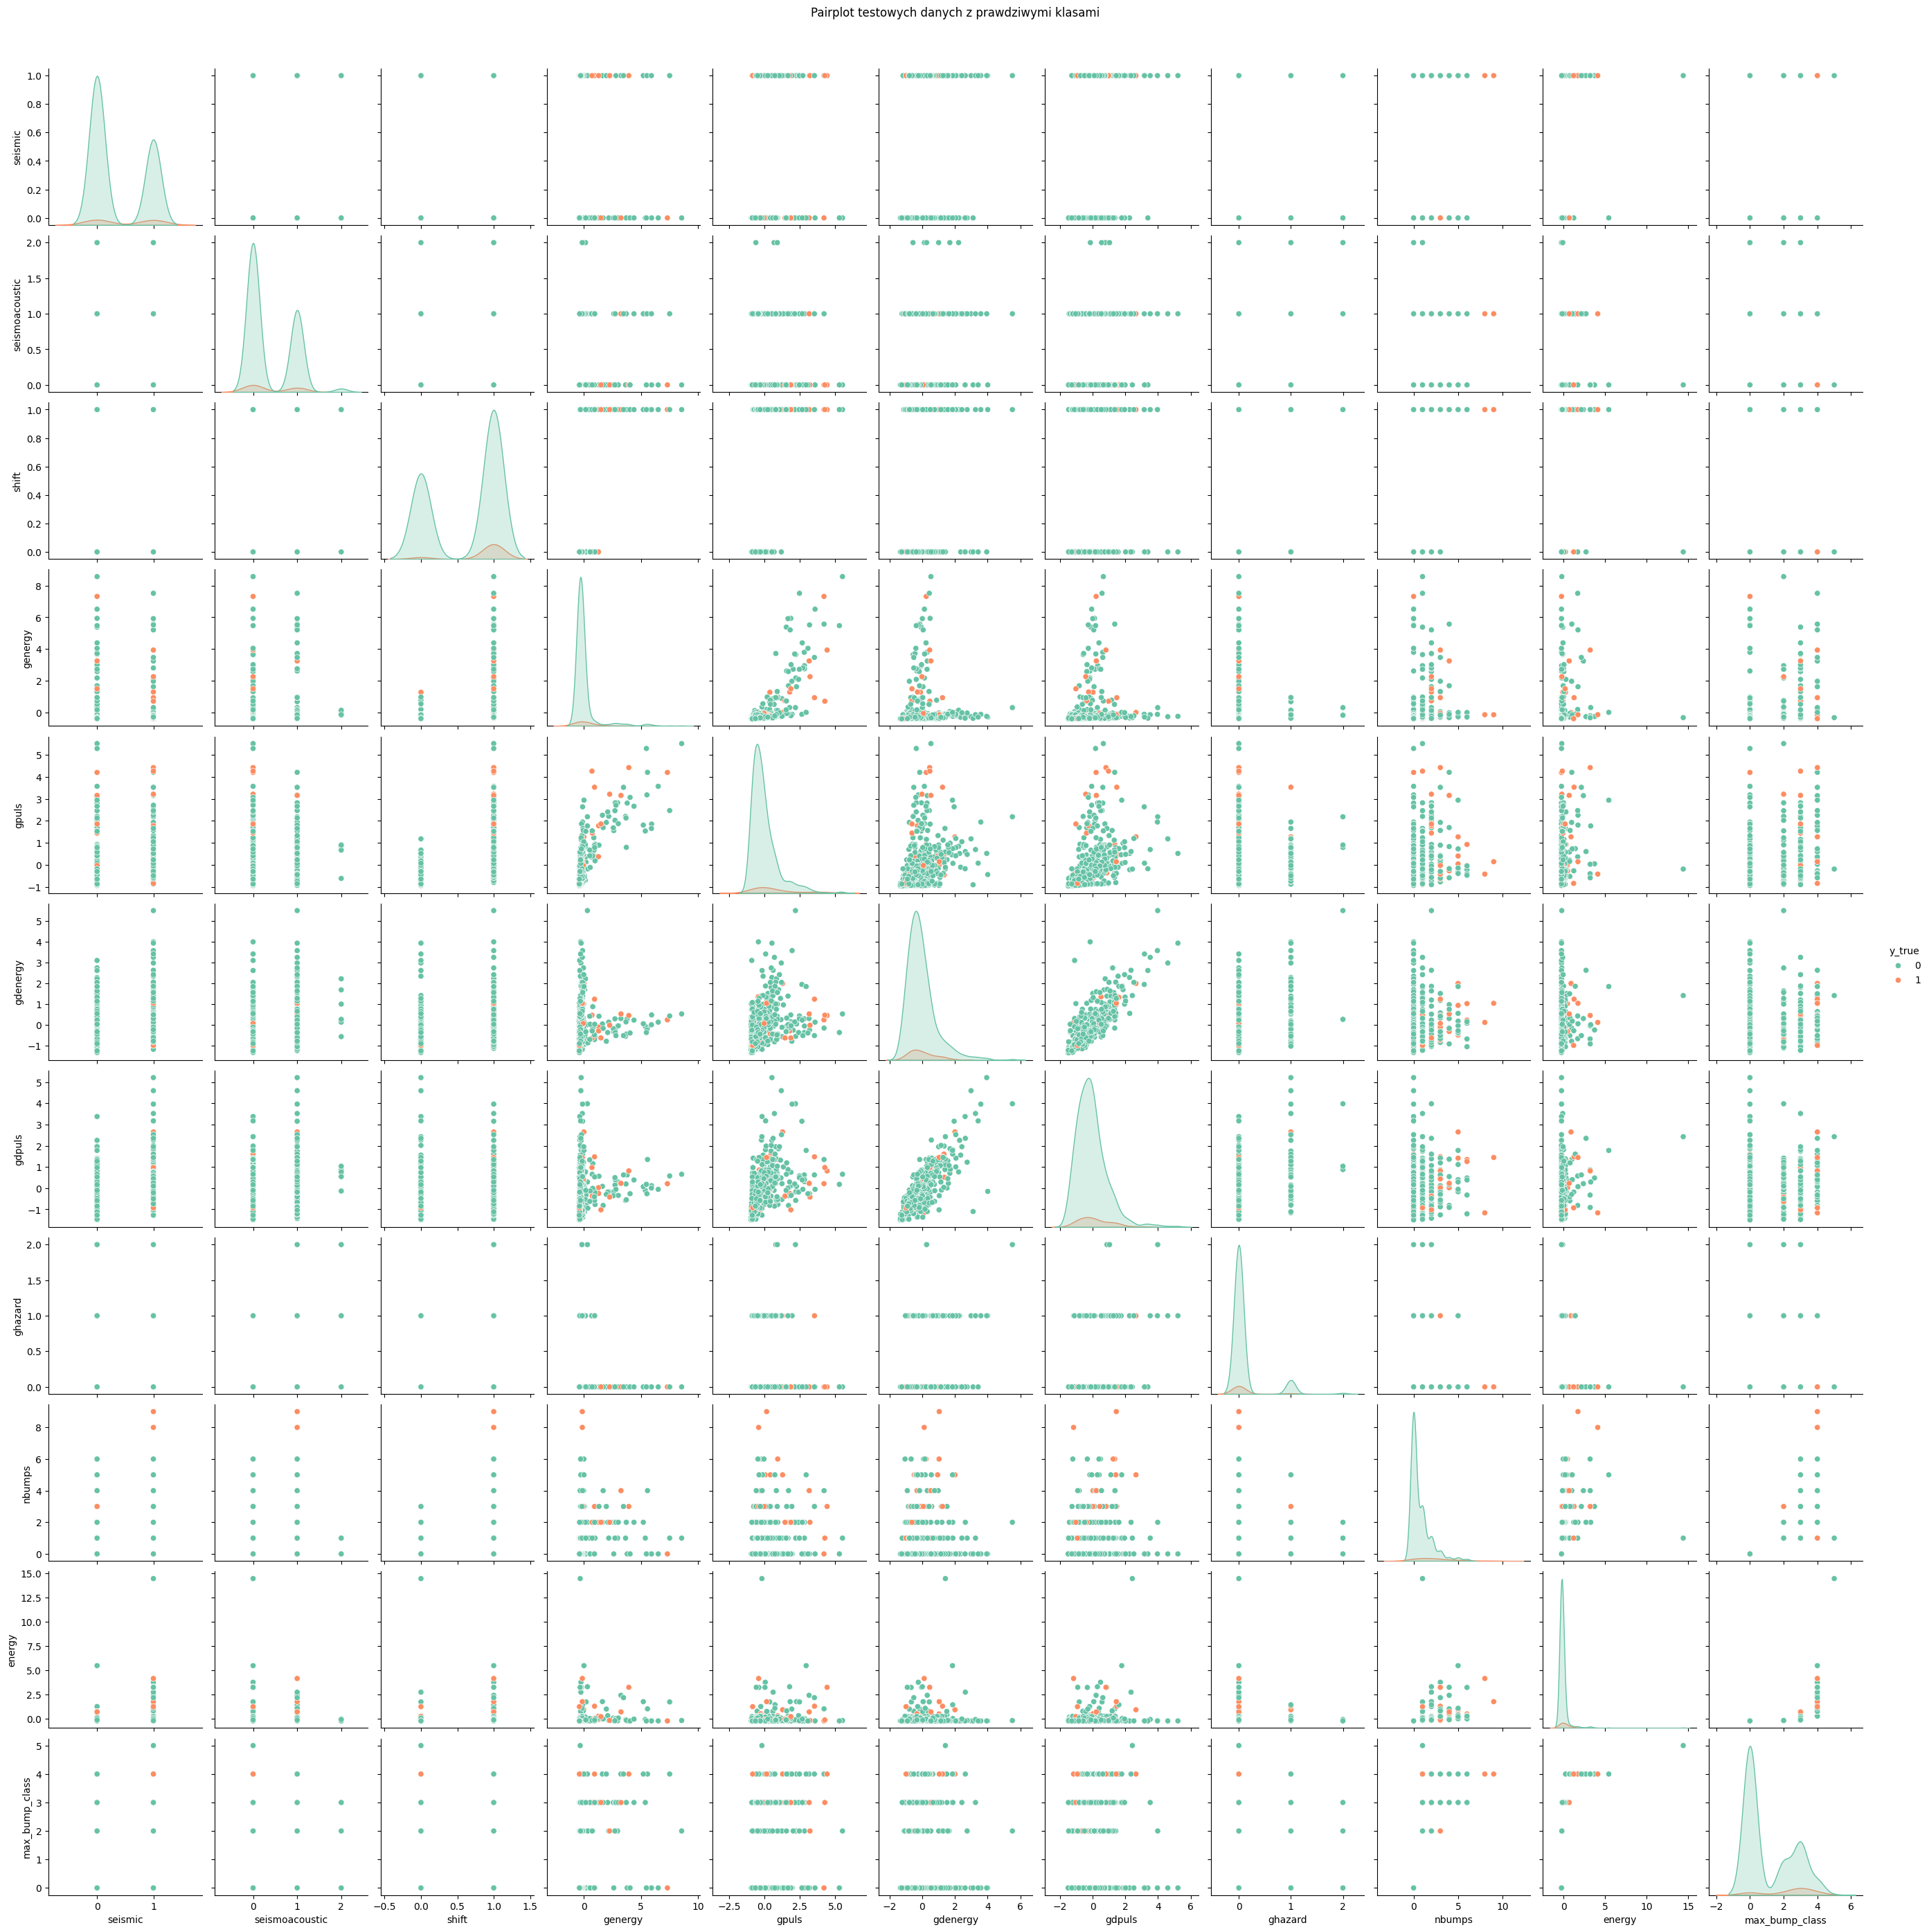

In [147]:
import seaborn as sns

df_plot = X_test.copy()
df_plot['y_true'] = y_test
df_plot['y_pred'] = y_pred

sns.pairplot(df_plot, hue='y_true', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot testowych danych z prawdziwymi klasami", y=1.02)
plt.show()


### Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       480
           1       0.24      0.43      0.31        37

    accuracy                           0.86       517
   macro avg       0.60      0.66      0.62       517
weighted avg       0.90      0.86      0.88       517



### 